![Neu](https://user-images.githubusercontent.com/59803099/102694091-ca79cf80-41ec-11eb-8baf-fa765175202c.jpg)


# INFO 7390 – Advances in  Data Sciences  & Architecture


# Project Name: Recursive Harmony Search Based Classifier Ensemble Reduction

## Team Members: Shalini Chandra (001062801) & Shubham Mahajan (001314273)
                           

## Project objective:
### Improve accuracy, diversity and reduce memory and storage requirement of ensemble classifier by eliminating redundancy.

# Abstract
In recent times classifier ensembles have become a mainstay in data mining and machine learning. The combination
of several classifiers generally results in better performance and accuracy as compared to a single classifier. There are many
different methods and techniques for constructing ensembles. Most of the time however, when these ensemble classifiers are
constructed, the data used in the construction of ensemble classifiers becomes redundant. This redundant data results in
a loss of accuracy and an increase in memory and system overhead. Therefore by removing this redundant data we can
reduce the memory and system overhead as well as obtain an increase in accuracy. The redundant data can be eliminated by
using a technique called feature selection. Feature selection is used to select the most relevant features while performing any
task. There are many different feature selection algorithms such as memetic algorithms, sub-modular feature selection, etc. The
feature selection technique can be used to choose the relevant data and eliminate the redundant data. The way to eliminate
redundant data in ensemble classifiers is to perform classifier ensemble reduction. This paper discusses using feature selection and in particular employing recursive harmony search to perform classifier ensemble reduction via feature selection. The final ensemble classifier will be a reduced set of the original ensemble
classifier, while maintaining diversity and accuracy of the original
one.

## Dataset 
The recursive harmony search feature selection algorithm  was tested against 2 datasets: <br>
- The bank dataset (source: https://archive.ics.uci.edu/ml/datasets/bank+marketing)
- The heart dataset (source: https://archive.ics.uci.edu/ml/datasets/heart+disease)

This notebook specifically shows implemtation for the bank dataset. Algorithm has been tested against the heart dataset also, the result of which are attached at the end of this notebook. <br>
For each dataset, we tested the performance with and without applying the recursive harmony search feature selection algorithm.

# Introduction

● Ensemble learning: A machine learning approach where multiple classifiers are trained to solve
the same problem.

● The main objective of ensemble classifiers is to improve the performance of stand alone
classifiers.

● Problem: Redundant classifiers and redundant data.

● Consequence:

  - No improvement in accuracy and diversity.
  - Increased training and testing time.

● Therefore the time and data constraints result in a significant overhead to system memory and
run time.

# Harmony Search


As we know, when musicians compose the harmony, they usually try various possible combinations of the music pitches stored in their memory. This search for the perfect harmony is indeed analogous to the procedure of finding the optimal solutions to engineering problems. The HS method is actually inspired by the working principles of the harmony improvisation. The pseudocode of the HS is given in Algorithm 1.


![Algo](https://user-images.githubusercontent.com/59803099/102680716-d2a02380-4188-11eb-932d-b4c65de4eabb.JPG)


Harmony search is a meta heuristic algorithm which is based on finding a solution vector to optimize the cost function of a given optimization problem.

● Essentially harmony search is selecting the set of notes (set of features) that produce the best
harmony (global optimum).

● The musician is the decision variable, the musician decides whether a note should be included in
the harmony or not. The harmony (feature subset) is composed of notes that the musicians decide
on.

● Evaluate the feature subsets to identify the best harmony that is produced by the decisions of the
musicians.

# Harmony Search Feature Selection


● The feature selection algorithm to perform classifier ensemble reduction is inspired from the
harmony search algorithm.

● The notes are the base classifiers and the harmony is the ensemble classifier.

● The idea is that the musician will select whether to use a base model or not, that is whether the base model should be included in the group of classifiers forming the ensemble classifier.

● Problem: Reliance on a randomly initialized harmony search matrix, which could lead to a
suboptimal solution.

# Recursive Harmony Search Feature Selection

● To overcome the drawback we proposed an extension to the harmony search feature selection
algorithm.

● The recursive harmony search feature selection algorithm reduces the reliance of the harmony
search feature selection algorithm on the initial matrix.

● Recursive harmony search feature selection initializes multiple harmony matrices and
evaluates these matrices recursively (using harmony search) to find the optimal matrix across
all the initial matrices.

● This final matrix leads to an optimal solution as the reliance on the randomly initialized
harmony search matrix is vastly reduced.

# Ensembling

Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model. That is why ensemble methods placed first in many prestigious machine learning competitions, such as the Netflix Competition, KDD 2009, and Kaggle.
The Statsbot team wanted to give you the advantage of this approach and asked a data scientist, Vadim Smolyakov, to dive into three basic ensemble learning techniques.

Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking).
Ensemble methods can be divided into two groups:

- sequential ensemble methods where the base learners are generated sequentially (e.g. AdaBoost).
The basic motivation of sequential methods is to exploit the dependence between the base learners. The overall performance can be boosted by weighing previously mislabeled examples with higher weight.
- parallel ensemble methods where the base learners are generated in parallel (e.g. Random Forest).
The basic motivation of parallel methods is to exploit independence between the base learners since the error can be reduced dramatically by averaging.

In [1]:
import pandas as pd
import random
import numpy as np
import category_encoders as ce
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import OneHotEncoder
import joblib
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, log_loss, accuracy_score, \
mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed
from functools import partial
np.random.seed(1338)

# Evaluation Metrics

In [2]:
def metric_set(metric):
    
    global metric_score
    global metric_grid_search
    metric_functions = {'roc_auc_score' : [roc_auc_score, 'roc_auc'], 'average_precision_score' : 
                        [average_precision_score, 'average_precision'], 'f1_score' : [f1_score, 'f1'],
                        'log_loss' : [log_loss, 'log_loss'], 'accuracy_score' : [accuracy_score, 'accuracy'],
                        'mean_absolute_error' : [mean_absolute_error,'mean_absolute_error'],
                        'mean_squared_error':[mean_squared_error, 'mean_squared_error'],
                        'r2_score' : [r2_score, 'r2']
                        }
    
    metric_score = metric_functions[metric][0]
    metric_grid_search = metric_functions[metric][1]

# Getting The Data

In [3]:
def data_import(data, label_output, split = True, stratify = True, split_size = 0.3):
    
    global Data
    Data = data
    
    #Reading the data, into a Data Frame.
    global target_label
    target_label = label_output

    #Selcting the columns of string data type
    names = data.select_dtypes(include = ['object'])
    
    #Converting string categorical variables to integer categorical variables.
    label_encode(names.columns.tolist())
    
    if(target_label in names):
        
        columns = names.drop([target_label],axis=1).columns.tolist()
        
    else:
        
        columns = names
        
    #This function intializes the dataframes that will be used later in the program
    #data_initialize()
    
    #Splitting the data into to train and test sets, according to user preference
    if(split == True):
        
        test_data = data_split(stratify,split_size)
        return test_data

In [4]:
#Function that encodes the string values to numerical values.
def label_encode(column_names):
    
    global Data
    #Encoding the data, encoding the string values into numerical values.
    encoder = ce.OrdinalEncoder(cols = column_names, verbose = 1)
    Data = encoder.fit_transform(Data)

# Data For Ensembling (Training)

In [5]:
#The dataframes will be used in the training phase of the ensemble models
def second_level_train_data(predict_list, cross_val_X, cross_val_Y):
    
    #Converting the list of predictions into a dataframe, which will be used to train the stacking model.
    global stack_X
    stack_X = pd.DataFrame()
    stack_X = stack_X.append(build_data_frame(predict_list))
    
    #Building a list that contains all the raw features, used as cross validation data for the base models.
    global raw_features_X
    raw_features_X = pd.DataFrame()
    raw_features_X = raw_features_X.append(cross_val_X,ignore_index=True)
    
    #The data frame will contain the predictions and raw features  of the base models, for training the blending
    #model
    global blend_X
    blend_X = pd.DataFrame()
    blend_X = pd.concat([raw_features_X, stack_X], axis = 1, ignore_index = True)
    
    #Storing the cross validation dataset labels in the variable stack_Y, 
    #which will be used later to train the stacking and blending models.
    global stack_Y
    stack_Y = cross_val_Y  

# Data For Ensembling (Testing)

In [6]:
#The dataframes will be used in the testing phase of the ensemble models
def second_level_test_data(predict_list, test_X, test_Y):
    
    #Converting the list of predictions into a dataframe, which will be used to test the stacking model.
    global test_stack_X
    test_stack_X = pd.DataFrame()
    test_stack_X = test_stack_X.append(build_data_frame(predict_list))
    
    #Building a list that contains all the raw features, used as test data for the base models.
    global test_raw_features_X
    test_raw_features_X = pd.DataFrame()
    test_raw_features_X = test_raw_features_X.append(test_X,ignore_index=True)
    
    #The data frame will contain the predictions and raw features of the base models, for testing the blending
    #model
    global test_blend_X
    test_blend_X = pd.DataFrame()
    test_blend_X = pd.concat([test_raw_features_X, test_stack_X], axis = 1, ignore_index = True)
    
    #Storing the cross validation dataset labels in the variable stack_Y, 
    #which will be used later to test the stacking and blending models.
    global test_stack_Y
    test_stack_Y = test_Y  

In [7]:
#Splitting the data into training and testing datasets
def data_split(stratify, split_size):
    
    global Data
    
    #Stratified Split
    if(stratify == True):
        Data, test = train_test_split(Data, test_size = split_size, stratify = Data[target_label],random_state = 0)
        
    #Random Split
    else:
        Data, test = train_test_split(Data, test_size = split_size,random_state = 0) 
        
    return test

In [8]:
#This function is used to convert the predictions of the base models (numpy array) into a DataFrame.
def build_data_frame(data):
    
    data_frame = pd.DataFrame(data).T
    return data_frame

# Decision Tree

In [9]:
#Trains the Decision Tree model. Performing a grid search to select the optimal parameter values
def train_decision_tree(train_X, train_Y, parameters_decision_tree):
    
    decision_tree_model = DecisionTreeClassifier()      
    model_gs = GridSearchCV(decision_tree_model, parameters_decision_tree, scoring = metric_grid_search)
    model_gs.fit(train_X,train_Y)
    return model_gs

In [10]:
#Predicts the output on a set of data, the built model is passed as a parameter, which is used to predict
def predict_decision_tree(data_X, data_Y, decision_tree):
    
    predicted_values = decision_tree.predict_proba(data_X)[:, 1]
    metric = metric_score(data_Y, predicted_values)
    
    return [metric,predicted_values]

In [11]:
def parameter_set_decision_tree(criterion = ['gini'], splitter = ['best'], max_depth = [None],\
                                min_samples_split = [2], min_samples_leaf = [1], min_weight_fraction_leaf = [0.0],\
                                max_features = [None], random_state = [None], max_leaf_nodes = [None],\
                                class_weight = [None], presort = [False]):
    
    parameters_decision_tree = {}
    parameters_decision_tree['criterion'] = criterion
    parameters_decision_tree['splitter'] = splitter
    parameters_decision_tree['max_depth'] = max_depth
    parameters_decision_tree['min_samples_split'] = min_samples_split
    parameters_decision_tree['min_samples_leaf'] = min_samples_leaf
    parameters_decision_tree['min_weight_fraction_leaf'] = min_weight_fraction_leaf
    parameters_decision_tree['max_features'] = max_features
    parameters_decision_tree['random_state'] = random_state
    parameters_decision_tree['max_leaf_nodes'] = max_leaf_nodes
    parameters_decision_tree['class_weight'] = class_weight
    parameters_decision_tree['presort'] = presort
    
    return parameters_decision_tree

# Random Forest

In [12]:
#Trains the Random Forest model. Performing a grid search to select the optimal parameter values
def train_random_forest(train_X, train_Y, parameters_random_forest):
    
    random_forest_model = RandomForestClassifier()
    model_gs = GridSearchCV(random_forest_model, parameters_random_forest, scoring = metric_grid_search)
    model_gs.fit(train_X,train_Y)
    return model_gs

In [13]:
#Predicts the output on a set of data, the built model is passed as a parameter, which is used to predict
def predict_random_forest(data_X, data_Y, random_forest):
    
    predicted_values = random_forest.predict_proba(data_X)[:, 1]
    metric = metric_score(data_Y, predicted_values)
    
    return [metric,predicted_values]

In [14]:
#Parameters for random forest. To perform hyper parameter optimisation a list of multiple elements can be entered
#and the optimal value in that list will be picked using grid search
def parameter_set_random_forest(n_estimators = [10], criterion = ['gini'], max_depth = [None],\
                                min_samples_split = [2], min_samples_leaf = [1], min_weight_fraction_leaf = [0.0],\
                                max_features = ['auto'], max_leaf_nodes = [None], bootstrap = [True],\
                                oob_score = [False], random_state = [None], verbose = [0],warm_start = [False],\
                                class_weight = [None]):
    
    parameters_random_forest = {}
    parameters_random_forest['criterion'] = criterion
    parameters_random_forest['n_estimators'] = n_estimators
    parameters_random_forest['max_depth'] = max_depth
    parameters_random_forest['min_samples_split'] = min_samples_split
    parameters_random_forest['min_samples_leaf'] = min_samples_leaf
    parameters_random_forest['min_weight_fraction_leaf'] = min_weight_fraction_leaf
    parameters_random_forest['max_features'] = max_features
    parameters_random_forest['random_state'] = random_state
    parameters_random_forest['max_leaf_nodes'] = max_leaf_nodes
    parameters_random_forest['class_weight'] = class_weight
    parameters_random_forest['bootstrap'] = bootstrap
    parameters_random_forest['oob_score'] = oob_score
    parameters_random_forest['warm_start'] = warm_start
    
    return parameters_random_forest

# Linear Regression

In [15]:
#Trains the Linear Regression model. Performing a grid search to select the optimal parameter values
def train_linear_regression(train_X, train_Y, parameters_linear_regression):
    
    linear_regression_model = linear_model.LinearRegression()
    train_X=StandardScaler().fit_transform(train_X)
    model_gs = GridSearchCV(linear_regression_model, parameters_linear_regression,\
                                        scoring = metric_grid_search)
    model_gs.fit(train_X,train_Y)
    return model_gs

In [16]:
#Predicts the output on a set of data, the built model is passed as a parameter, which is used to predict
def predict_linear_regression(data_X, data_Y, linear_regression):
    
    data_X = StandardScaler().fit_transform(data_X)
    predicted_values = linear_regression.predict(data_X)
    metric = metric_score(data_Y, predicted_values)
    
    return [metric,predicted_values]

In [17]:
#Parameters for linear regression. To perform hyper parameter optimisation a list of multiple elements can be entered
#and the optimal value in that list will be picked using grid search
def parameter_set_linear_regression(fit_intercept = [True], normalize = [False], copy_X = [True]):
    
    parameters_linear_regression = {}
    parameters_linear_regression['fit_intercept'] = fit_intercept
    parameters_linear_regression['normalize'] = normalize
    
    return parameters_linear_regression

# Logistic Regression

In [18]:
#Trains the Logistic Regression  model. Performing a grid search to select the optimal parameter values
def train_logistic_regression(train_X, train_Y, parameters_logistic_regression):

    logistic_regression_model = linear_model.LogisticRegression()
    #train_X=StandardScaler().fit_transform(train_X)
    model_gs = GridSearchCV(logistic_regression_model, parameters_logistic_regression,\
                                        scoring = metric_grid_search)
    model_gs.fit(train_X,train_Y)
    return model_gs

In [19]:
#Predicts the output on a set of data, the built model is passed as a parameter, which is used to predict
def predict_logistic_regression(data_X, data_Y, logistic_regression):
    
    #data_X = StandardScaler().fit_transform(data_X)
    predicted_values = logistic_regression.predict_proba(data_X)[:, 1]
    
    if(metric_grid_search in ['f1', 'log_loss', 'accuracy', 'mean_squared_error', 'mean_absolute_error', 'r2']):
        
        predictions = logistic_regression.predict(data_X)
        metric = metric_score(data_Y, predictions)
        
    else :
        
        metric = metric_score(data_Y, predicted_values)
    
    return [metric,predicted_values]

In [20]:
#Parameters for logistic regression. To perform hyper parameter optimisation a list of multiple elements can be entered
#And the optimal value in that list will be picked using grid search
def parameter_set_logistic_regression(penalty = ['l2'], dual = [False], tol = [0.0001], C = [1.0],\
                                      fit_intercept = [True], intercept_scaling = [1], class_weight = [None],\
                                      random_state = [None], solver = ['liblinear'], max_iter = [100],\
                                      multi_class = ['ovr'], verbose = [0], warm_start = [False]):
    
    parameters_logistic_regression = {}
    parameters_logistic_regression['penalty'] = penalty
    parameters_logistic_regression['dual'] = dual
    parameters_logistic_regression['tol'] = tol
    parameters_logistic_regression['C'] = C
    parameters_logistic_regression['fit_intercept'] = fit_intercept
    parameters_logistic_regression['intercept_scaling'] = intercept_scaling
    parameters_logistic_regression['class_weight'] = class_weight
    parameters_logistic_regression['solver'] = solver
    parameters_logistic_regression['max_iter'] = max_iter
    parameters_logistic_regression['multi_class'] = multi_class
    parameters_logistic_regression['warm_start'] = warm_start
    
    return parameters_logistic_regression

In [21]:
#Parameters for logistic regression. To perform hyper parameter optimisation a list of multiple elements can be entered
#And the optimal value in that list will be picked using grid search
def parameter_set_stacking(penalty = ['l2'], dual = [False], tol = [0.0001], C = [1.0],\
                                      fit_intercept = [True], intercept_scaling = [1], class_weight = [None],\
                                      random_state = [None], solver = ['liblinear'], max_iter = [100],\
                                      multi_class = ['ovr'], verbose = [0], warm_start = [False]):
    
    parameters_stacking = {}
    parameters_stacking['penalty'] = penalty
    parameters_stacking['dual'] = dual
    parameters_stacking['tol'] = tol
    parameters_stacking['C'] = C
    parameters_stacking['fit_intercept'] = fit_intercept
    parameters_stacking['intercept_scaling'] = intercept_scaling
    parameters_stacking['class_weight'] = class_weight
    parameters_stacking['solver'] = solver
    parameters_stacking['max_iter'] = max_iter
    parameters_stacking['multi_class'] = multi_class
    parameters_stacking['warm_start'] = warm_start
    
    return parameters_stacking

# Stacking

In [22]:
#The stacked ensmeble will be trained by using one or more of the base model algorithms
#The function of the base model algorithm that will be used to train will be passed as the
#model_function parameter and the parameters required to train the algorithm/model will be passed as the
#model_parameters parameter
def train_stack(data_X, data_Y, model_function, model_parameters):
    
    model = model_function(data_X, data_Y, model_parameters)
    return model

In [23]:
#Predicts the output on a set of stacked data, after the stacked model has been built by using a base model
#algorithm, hence we need the predict funcction of that base model algorithm to get the predictions
#The predict function of the base model is passed as the predict_function parameter and its respective model is 
#passed as the model parameter
def predict_stack(data_X, data_Y, predict_function, model):
    
    metric,predicted_values = predict_function(data_X, data_Y, model)
    return [metric,predicted_values]

# Blending

In [24]:
#The blending ensmeble will be trained by using one or more of the base model algorithms
#The function of the base model algorithm that will be used to train will be passed as the
#model_function parameter and the parameters required to train the algorithm/model will be passed as the
#model_parameters parameter
def train_blend(data_X, data_Y, model_function, model_parameters):
    
    model = model_function(blend_X, data_Y, model_parameters)
    return model

In [25]:
#Predicts the output on a set of blended data, after the blending model has been built by using a base model
#algorithm, hence we need the predict function of that base model algorithm to get the predictions
#The predict function of the base model is passed as the predict_function parameter and its respective model is 
#passed as the model parameter
def predict_blend(data_X, data_Y, predict_function, model):
    
    metric,predicted_values = predict_function(test_blend_X, data_Y, model)
    return [metric,predicted_values]

# Training & Predictions

In [26]:
#Constructing a list (train_model_list) that contains a tuple for each base model, the tuple contains the name of 
#the function that trains the base model, and the paramters for training the base model. 

#Constructing a list (predict_model_list) that contains a tuple for each base model, the tuple contains the name of 
#the function that computes the predictions for the base model.

#In the list computed for stacking and blending, the tuples have an additional element which is the train_stack 
#function or the train_blend function. This is done because different set of data (predictions of base models) 
#needs to be passed to the base model algorithms. These function enable performing the above procedure

#These lists are constructed in such a way to enable the ease of use of the joblib library, i.e the parallel 
#module/function

def construct_model_parameter_list(model_list, parameters_list, stack = False, blend = False):
    
    model_functions = {#'multi_layer_perceptron' : [train_multi_layer_perceptron,predict_multi_layer_perceptron],
                       'decision_tree' : [train_decision_tree,predict_decision_tree],
                       'random_forest' : [train_random_forest,predict_random_forest],
                       'linear_regression' : [train_linear_regression,predict_linear_regression],
                       'logistic_regression' : [train_logistic_regression,predict_logistic_regression]
                      }
    
    train_model_list = list()
    predict_model_list = list()
    model_parameter_index = 0
    
    for model in model_list:
        
        if(stack == True):
            
            train_model_list.append((model_functions[model][0],parameters_list[model_parameter_index]\
                                         ,train_stack))
            predict_model_list.append((model_functions[model][1],predict_stack))
            
        elif(blend == True):
            
            train_model_list.append((model_functions[model][0],parameters_list[model_parameter_index]\
                                         ,train_blend))
            predict_model_list.append((model_functions[model][1],predict_blend))
            
        else:
            
            train_model_list.append((model_functions[model][0],parameters_list[model_parameter_index]))
            predict_model_list.append(model_functions[model][1])
            
        model_parameter_index = model_parameter_index + 1
        
    return [train_model_list,predict_model_list]

In [27]:
#This function computes a list where each element is a tuple that contains the predict function of the base model
#along with the corresponding base model object. This is done so that the base model object can be passed to the
#predict function as a prameter to compute the predictions when using joblib's parallel module/function. 
def construct_model_predict_function_list(model_list, models,predict_model_list):
    
    model_index = 0
    model_function_list = list()
    for model in model_list:
        
        model_function_list.append((predict_model_list[model_index],models[model_index]))
        model_index = model_index + 1
    return model_function_list

In [28]:
#This function calls the respective training and predic functions of the base models.
def train_base_models(model_list, parameters_list, save_models = False):
    
    #print('\nTRAINING BASE MODELS\n')
    
    #Cross Validation using Stratified K Fold
    train, cross_val = train_test_split(Data, test_size = 0.5, stratify = Data[target_label],random_state = 0)
    
    #Training the base models, and calculating AUC on the cross validation data.
    #Selecting the data (Traing Data & Cross Validation Data)
    train_Y = train[target_label]
    train_X = train.drop([target_label],axis=1)
 
    cross_val_Y = cross_val[target_label]
    cross_val_X = cross_val.drop([target_label],axis=1)
    
    #The list of base models the user wants to train.
    global base_model_list
    base_model_list = model_list

    
    #No of base models that user wants to train
    global no_of_base_models
    no_of_base_models = len(base_model_list)
    
    
    #We get the list of base model training functions and predict functions. The elements of the two lists are  
    #tuples that have (base model training function,model parameters), (base model predict functions) respectively
    [train_base_model_list,predict_base_model_list] = construct_model_parameter_list(base_model_list,\
                                                                                     parameters_list)
    

    #Training the base models parallely, the resulting models are stored which will be used for cross validation.
    models = (Parallel(n_jobs = -1)(delayed(function)(train_X, train_Y, model_parameter)\
                                                   for function, model_parameter in train_base_model_list))

    #A list with elements as tuples containing (base model predict function, and its respective model object) is 
    #returned. This list is used in the next step in the predict_base_models function, the list will be used in
    #joblibs parallel module/function to compute the predictions and metric scores of the base models
    #Appended in the following manner so it can be used in joblib's parallel module/function
    global base_model_predict_function_list
    base_model_predict_function_list = construct_model_predict_function_list(base_model_list, models,\
                                                                        predict_base_model_list)
    predict_list, data_X, data_Y = predict_base_models(cross_val_X, cross_val_Y,mode = 'train')
    
    return [predict_list, data_X, data_Y]

# Prediction: Base Classifier

In [29]:
def predict_base_models(data_X, data_Y,mode):
    
    #print('\nTESTING/CROSS VALIDATION BASE MODELS\n')
    
    predict_list = list()

    #predict_multi_layer_perceptron = list()
    predict_decision_tree = list()
    predict_random_forest = list()
    predict_linear_regression = list()
    predict_logistic_regression = list()
    
    metric_linear_regression = list()
    metric_logistic_regression = list()
    metric_decision_tree = list()
    metric_random_forest = list()
    metric_multi_layer_perceptron = list()
    
    auc_predict_index = 0
    
    #Initializing a list which will contain the predictions of the base models and the variables that will
    #calculate the metric score
    model_predict_metric = {#'multi_layer_perceptron' : [predict_multi_layer_perceptron, metric_multi_layer_perceptron],
                       'decision_tree' : [predict_decision_tree, metric_decision_tree],
                       'random_forest' : [predict_random_forest, metric_random_forest],
                       'linear_regression' : [predict_linear_regression, metric_linear_regression],
                       'logistic_regression' : [predict_logistic_regression, metric_logistic_regression]
                      }
    
    #Computing the AUC and Predictions of all the base models on the cross validation data parallely.
    auc_predict_cross_val = (Parallel(n_jobs = -1)(delayed(function)(data_X, data_Y, model)
                                               for function, model in base_model_predict_function_list))
    
    #Building the list which will contain all the predictions of the base models and will also display the metric
    #scores of the base models
    for model in base_model_list:
        
        #Assigning the predictions and metrics computed for the respective base model
        model_predict_metric[model] = auc_predict_cross_val[auc_predict_index][1],\
        auc_predict_cross_val[auc_predict_index][0]
        auc_predict_index = auc_predict_index + 1
        
        if(model == 'multi_layer_perceptron'):
            
            #This is done only for multi layer perceptron because the predictions returned by the multi layer 
            #perceptron model is a list of list, the below piece of code converts this nested list into a single
            #list
            predict_list.append(np.asarray(sum(model_predict_metric[model][0].tolist(), [])))
            
        else:
            
            #The below list will contain all the predictions of the base models.
            predict_list.append(model_predict_metric[model][0])
        
        #Printing the name of the base model and its corresponding metric score
        print_metric(model,model_predict_metric[model][1])
    
    return [predict_list, data_X, data_Y]

# Ensemble Classifier

In [30]:
#Training the second level models parallely
def train_ensemble_models(stack_model_list = [], stack_parameters_list = [], blend_model_list = [],\
                              blend_parameters_list = [], perform_weighted_average = False, weights_list = None,
                          save_models = False):
    
    #print('\nTRAINING ENSEMBLE MODELS\n')
    
    global no_of_ensemble_models
    
    #This list will contain the names of the models/algorithms that have been used as second level models
    #This list will be used later in the testing phase for identifying which model belongs to which ensemble
    #(stacking or blending), hence the use of dictionaries as elements of the list
    #Analogous to the base_model_list
    global ensmeble_model_list
    ensmeble_model_list = list()
    
    train_stack_model_list = list() 
    predict_stack_model_list = list()
    train_blend_model_list = list()
    predict_blend_model_list = list()
    
    #The list will be used to train the ensemble models, while using joblib's parallel
    train_second_level_models = list() 
    
    #Stacking will not be done if user does not enter the list of models he wants to use for stacking
    if(stack_model_list != []):
        
        #Appending a dictionary that contians key-Stacking and its values/elements are the names of the 
        #models/algorithms that are used for performing the stacking procedure, this is done so that it will be easy
        #to identify the models belonging to the stacking ensemble
        ensmeble_model_list.append({'Stacking' : stack_model_list})
        
        #We get the list of stacked model training functions and predict functions. The elements of the two   
        #lists are tuples that have(base model training function,model parameters,train_stack function),
        #(base model predict functions,predict_stack function) respectively
        [train_stack_model_list,predict_stack_model_list] = construct_model_parameter_list(stack_model_list,\
                                                                                           stack_parameters_list,
                                                                                           stack=True)
        
    #Blending will not be done if user does not enter the list of models he wants to use for blending
    if(blend_model_list != []):
        
        #Appending a dictionary that contians key-Blending and its values/elements are the names of the 
        #models/algorithms that are used for performing the blending procedure, this is done so that it will be easy
        #to identify the models belonging to the blending ensemble
        ensmeble_model_list.append({'Blending' : blend_model_list})

        #We get the list of blending model training functions and predict functions. The elements of the two   
        #lists are tuples that have(base model training function,model parameters,train_blend function),
        #(base model predict functions,predict_blend function) respectively
        [train_blend_model_list,predict_blend_model_list] = construct_model_parameter_list(blend_model_list,\
                                                                                           blend_parameters_list,\
                                                                                           blend=True)
        
    #The new list contains either the stacked models or blending models or both or remain empty depending on what 
    #the user has decided to use
    train_second_level_models = train_stack_model_list + train_blend_model_list
    
   

        
    no_of_ensemble_models = len(train_second_level_models)

    #If weighted average is performed, the last element of models will contain the metric score and weighted average
    #predictions, and not a model object. So we use the last element in different ways compared to the other model
    #objects
    
    #Training the ensmeble models parallely 
    models = Parallel(n_jobs = -1)(delayed(function)(stack_X, stack_Y, model, model_parameter)\
                                        for model, model_parameter, function in train_second_level_models)
    
    
    #A list with elements as tuples containing((base model predict function,predict_stack or predict_blend functions)
    #,and its respective base model object) is returned. This list is used in the next step in the   
    #predict_ensemble_models function, the list will be used in
    #joblibs parallel module/function to compute the predictions and metric score of the ensemble models
    #Appended in the following manner so it can be used in joblib's parallel module/function
    #Analogous to base_model_predict_function_list
    global ensmeble_model_predict_function_list
    ensmeble_model_predict_function_list = construct_model_predict_function_list(stack_model_list + blend_model_list,\
                                                                                 models, predict_stack_model_list 
                                                                                 + predict_blend_model_list)
    
   
        

In [31]:
def harmony_search(predictions, index,harmony_matrix):
    
    #global harmony_matrix
    prediction_list = list()
    k = 0
    prediction_list=predictions[:]
    for j in range(len(harmony_matrix[index])):
    
        if(harmony_matrix[index][j]==0):
            del prediction_list[k]
        else:
            k = k + 1
    return prediction_list

In [32]:
def harmony_search_adjust(index,harmony_matrix):
    
    #global harmony_matrix
    global hmcr
    global par
    
    for  i in range (len(harmony_matrix[index])):
        
        if(random.uniform(0,1)>hmcr):
        
            harmony_matrix[index][i] = harmony_matrix[random.randint(0,harmony_matrix.shape[0]-1)][i]
            if(random.uniform(0,1) > par):
                harmony_matrix[index][i] = (harmony_matrix[index][i] + 1)%2
                
        else:
        
            harmony_matrix[index][i] = random.randint(0,1)
            
    if(sum(harmony_matrix[index])==0):
        harmony_matrix = np.delete(harmony_matrix, (index), axis=0)
        
    return harmony_matrix

# Predictions: Ensemble Classfier

In [33]:
def predict_ensemble_models(data_X, data_Y):
    
    #print('\nTESTING ENSEMBLE MODELS\n')

    metric_linear_regression = list()
    metric_logistic_regression = list()
    metric_decision_tree = list()
    metric_random_forest = list()
    #metric_multi_layer_perceptron = list()
    metric_weighted_average = list()
    metric_stacking = list()
    metric_blending = list()
    
    auc_predict_index = 0
    
    #Initializing a list which will contain the predictions of the base models and the variables that will
    #calculate the metric score
    model_metric = {#'multi_layer_perceptron' : [metric_multi_layer_perceptron],
                       'decision_tree' : [metric_decision_tree],
                       'random_forest' : [metric_random_forest],
                       'linear_regression' : [metric_linear_regression],
                       'logistic_regression' : [metric_logistic_regression]
                      }
    
    #Computing the AUC and Predictions of all the ensmeble models on the test data parallely.
    auc_predict_cross_val = (Parallel(n_jobs = -1)(delayed(function[1])(data_X, data_Y, function[0],model)
                                               for function, model in ensmeble_model_predict_function_list))
    
    #ensemble_model_list is a list defined in the train_ensemble_models function, each element of the lsit is a
    #dictionary, that contains the name of the ensembling technique (key) and the models assocaited with it(values)
    
    #So the first for loop gives the dictionary
    for ensemble_models in ensmeble_model_list:
    
        #This for gives the key value pair, key being the name of the ensembling technique, value being a list
        #of the models used for that ensemble
        for ensemble,models in ensemble_models.items():
            
            #This for loop gives the iterates through the models present in the models list and asssigns 
            #the metric score and prints it
            for model in models:
                
                #Assigning the predictions and metrics computed for the respective ensemble model
                model_metric[model] = auc_predict_cross_val[auc_predict_index][0]
                auc_predict_index = auc_predict_index + 1
        
                #Printing the name of the ensmeble technique and its model and its corresponding metric score
                print_metric(ensemble + " " + model,model_metric[model])
                return model_metric[model]

In [34]:
def test_models(test_data):
    
    
    #Training the base models, and calculating AUC on the test data.
    #Selecting the data (Test Data)
    test_Y = test_data[target_label]
    test_X = test_data.drop([target_label],axis=1)
    
    prediction_list = predict_base_models(test_X,test_Y,mode='test')
    return prediction_list

In [35]:
def test_models_accuracy():
    
    accuracy = predict_ensemble_models(test_stack_X,test_stack_Y)
    return accuracy

In [36]:
def print_metric(model,metric_score):
    a = 2
    #Printing the metric score for the corresponding model.
    #print (model,'\n',metric_score)

In [37]:
def final_harmony_search(models,params):
    
    predict_list,data_X,data_Y = train_base_models(models,params)
    second_level_train_data(predict_list, data_X, data_Y)
    train_ensemble_models(['logistic_regression'],[param_l2])
    test_predictions,test_data_X,test_data_Y = test_models(data_test)
    second_level_test_data(test_predictions, test_data_X, test_data_Y)
    accuracy = test_models_accuracy()
    return accuracy

In [38]:
def get_new_models(init_models,params,harmony_matrix):
    j=0
    new_models = list()
    new_params = list()
    models = init_models[:]
    for i in harmony_matrix[0]:
        models[j]=models[j]*i 
        if(models[j]!=''):
            new_models.append(models[j])
            new_params.append(params[j])
        j=j+1
    return [new_models,new_params]

In [39]:
def hs(harmony_matrix):
    
    global number_of_iterations
    
    for k in range(number_of_iterations):
        worst_index = 0
        worst_accuracy = 100
        for i in range(harmony_matrix.shape[0]):

            prediction_list = harmony_search(predict_list, i,harmony_matrix)
            second_level_train_data(prediction_list, data_X, data_Y)
            train_ensemble_models(['logistic_regression'],[param_l2])
            test_predictions,test_data_X,test_data_Y = test_models(data_test)
            test_predictions_list = harmony_search(test_predictions, i,harmony_matrix)
            second_level_test_data(test_predictions_list, test_data_X, test_data_Y)
            accuracy = test_models_accuracy()

            if(accuracy < worst_accuracy):
                worst_accuracy = accuracy
                worst_index = i
        
    harmony_matrix = harmony_search_adjust(worst_index,harmony_matrix)

    
    print("Final Harmony Matrix")
    print(harmony_matrix)    
    prediction_list = harmony_search(predict_list, 0,harmony_matrix)
    second_level_train_data(prediction_list, data_X, data_Y)
    train_ensemble_models(['logistic_regression'],[param_l2])
    test_predictions,test_data_X,test_data_Y = test_models(data_test)
    test_predictions_list = harmony_search(test_predictions, 0,harmony_matrix)
    second_level_test_data(test_predictions_list, test_data_X, test_data_Y)
    best_accuracy = test_models_accuracy()

    hmsize = [1]*(harmony_matrix.shape[0]-1)

    for i in hmsize:

        prediction_list = harmony_search(predict_list, i,harmony_matrix)
        second_level_train_data(prediction_list, data_X, data_Y)
        train_ensemble_models(['logistic_regression'],[param_l2])
        test_predictions,test_data_X,test_data_Y = test_models(data_test)
        test_predictions_list = harmony_search(test_predictions, i,harmony_matrix)
        second_level_test_data(test_predictions_list, test_data_X, test_data_Y)
        accuracy = test_models_accuracy()

        if(accuracy > best_accuracy):
            best_accuracy = accuracy
            harmony_matrix = np.delete(harmony_matrix, (i-1), axis=0)
        else:
            harmony_matrix = np.delete(harmony_matrix, (i), axis=0)

    print('Optimal Harmony Matrix')
    print(harmony_matrix)
    return harmony_matrix

# IMPLEMENTATION : BANK DATASET

<h3>Implementation Details: <br>
    
• Base Classifiers: Decision Trees, Logistic Regression,Linear Regression, Random Forest <br>  
• Ensemble Classifier: Stacking (Logistic Regression) <br>
• Evaluation Metric: roc auc score <br>
• Harmony Memory Size: 7 <br>
• Harmony Memory Considering Rate: 0.7<br>
• Pitch Adjustment Rate: 0.4 <br>
    
Bank Dataset: <br>
• 41189 Instances<br>
• 21 Features **<br>

In [40]:
Bank = "https://raw.githubusercontent.com/shubham414/INFO-7390-ADS/main/Final%20Project%20-%20Recursive%20Harmony%20Search%20Based%20CER/Data%20and%20Result/bank-additional-full.csv"
Data = pd.read_csv(Bank,delimiter=';',header=0)
number_of_iterations = 10
number_of_rows = 7 # Harmony Memory Size
hmcr = 0.7 #Harmony Memory Considering Rate
par = 0.4 #Pitch Adjustment Rate

In [41]:
data_test = data_import(Data,label_output='y')
Data['y']=Data['y']-1
data_test['y']=data_test['y']-1
metric_set('roc_auc_score')
param_dt = parameter_set_decision_tree(max_depth = [6])
param_rf = parameter_set_random_forest()
param_r = parameter_set_random_forest(n_estimators=[20])
param_lr = parameter_set_linear_regression()
param_l2 = parameter_set_logistic_regression()
param_l = parameter_set_logistic_regression(C=[0.5])
param_l1 = parameter_set_logistic_regression(penalty = ['l1'])
param_d = parameter_set_decision_tree()

/usr/local/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## Number of models - 8

In [42]:
#Initializing 8 models with parameters
init_models_1 = ['decision_tree','random_forest','linear_regression','logistic_regression','logistic_regression',\
              'random_forest','logistic_regression','decision_tree']
init_params_1 = [param_dt, param_rf,param_lr, param_l2, param_l1,param_r,param_l,param_d]

In [43]:
#Step 1: Initializing  matrices 
harmony_matrix_1 = np.random.randint(2, size=(number_of_rows, len(init_models_1)))
harmony_matrix_2 = np.random.randint(2, size=(number_of_rows, len(init_models_1)))
harmony_matrix_3 = np.random.randint(2, size=(number_of_rows, len(init_models_1)))
harmony_matrix_4 = np.random.randint(2, size=(number_of_rows, len(init_models_1)))
harmony_matrix_5 = np.random.randint(2, size=(number_of_rows, len(init_models_1)))
harmony_matrix_6 = np.random.randint(2, size=(number_of_rows, len(init_models_1)))
harmony_matrix_7 = np.random.randint(2, size=(number_of_rows, len(init_models_1)))
harmony_matrix_8 = np.random.randint(2, size=(number_of_rows, len(init_models_1)))

In [44]:
print("Harmony Matrix 1")
print(harmony_matrix_1)
print("Harmony Matrix 2")
print(harmony_matrix_2)
print("Harmony Matrix 3")
print(harmony_matrix_3)
print("Harmony Matrix 4")
print(harmony_matrix_4)
print("Harmony Matrix 5")
print(harmony_matrix_5)
print("Harmony Matrix 6")
print(harmony_matrix_6)
print("Harmony Matrix 7")
print(harmony_matrix_7)
print("Harmony Matrix 8")
print(harmony_matrix_8)

Harmony Matrix 1
[[0 0 0 0 1 0 1 0]
 [1 0 0 0 1 1 0 0]
 [1 0 1 1 1 0 0 0]
 [1 0 0 1 1 1 0 1]
 [0 1 1 0 0 0 0 1]
 [0 1 1 0 0 1 1 0]
 [1 0 0 1 0 1 1 0]]
Harmony Matrix 2
[[1 1 0 1 1 1 0 0]
 [0 1 1 1 0 0 1 1]
 [0 1 1 0 0 1 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 1]
 [1 0 1 0 0 0 1 0]
 [0 0 1 1 0 1 0 1]]
Harmony Matrix 3
[[0 0 1 1 1 0 1 1]
 [0 0 1 1 0 1 1 1]
 [0 0 1 1 0 1 1 1]
 [0 0 0 1 0 0 1 1]
 [1 0 0 1 1 1 0 1]
 [0 0 0 0 1 0 0 1]
 [0 0 1 1 0 1 1 1]]
Harmony Matrix 4
[[1 1 1 0 0 1 1 0]
 [0 1 0 0 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [0 1 1 0 1 1 0 1]
 [0 0 0 0 0 0 0 1]
 [0 1 0 1 1 0 0 0]
 [1 1 1 1 1 1 0 1]]
Harmony Matrix 5
[[1 1 1 1 0 1 1 1]
 [0 0 1 1 0 1 1 0]
 [0 0 1 1 1 1 0 1]
 [1 1 1 1 0 0 1 1]
 [1 1 1 0 1 0 1 0]
 [0 0 1 0 0 1 1 1]
 [0 0 0 1 0 1 0 1]]
Harmony Matrix 6
[[0 1 0 1 0 0 1 1]
 [1 0 0 0 0 0 0 1]
 [1 1 0 1 0 0 1 0]
 [0 1 1 1 1 1 1 1]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 1 0]
 [0 0 1 0 1 1 1 1]]
Harmony Matrix 7
[[0 0 1 0 0 1 1 1]
 [1 1 0 1 1 0 1 0]
 [0 0 1 0 1 1 1 0]
 [0 1 0 0 0 1 0 0]
 

In [45]:
# Step 2: performing harmony search on each individual matrix.
# Step 3: The final matrices that are obtained after performing harmony search on the matrices in step 2 will be evaluated.
# Step 4: Identifying the optimal matrices for each individual matrix obtained from step 3.

predict_list,data_X,data_Y = train_base_models(init_models_1,init_params_1)

harmony_matrix_1 = hs(harmony_matrix_1)
harmony_matrix_2 = hs(harmony_matrix_2)
harmony_matrix_3 = hs(harmony_matrix_3)
harmony_matrix_4 = hs(harmony_matrix_4)
harmony_matrix_5 = hs(harmony_matrix_5)
harmony_matrix_6 = hs(harmony_matrix_6)
harmony_matrix_7 = hs(harmony_matrix_7)
harmony_matrix_8 = hs(harmony_matrix_8)

Final Harmony Matrix
[[0 1 0 0 0 0 0 1]
 [1 0 0 0 1 1 0 0]
 [1 0 1 1 1 0 0 0]
 [1 0 0 1 1 1 0 1]
 [0 1 1 0 0 0 0 1]
 [0 1 1 0 0 1 1 0]
 [1 0 0 1 0 1 1 0]]
Optimal Harmony Matrix
[[1 0 0 1 1 1 0 1]]
Final Harmony Matrix
[[1 1 0 1 1 1 0 0]
 [0 1 1 1 0 0 1 1]
 [0 1 1 0 0 1 0 0]
 [1 1 1 1 1 1 1 0]
 [1 0 1 0 1 1 0 1]
 [1 0 1 0 0 0 1 0]
 [0 0 1 1 0 1 0 1]]
Optimal Harmony Matrix
[[1 1 0 1 1 1 0 0]]
Final Harmony Matrix
[[0 0 1 1 1 0 1 1]
 [0 0 1 1 0 1 1 1]
 [0 0 1 1 0 1 1 1]
 [0 0 0 1 0 0 1 1]
 [1 0 0 1 1 1 0 1]
 [1 0 0 0 0 1 1 0]
 [0 0 1 1 0 1 1 1]]
Optimal Harmony Matrix
[[1 0 0 1 1 1 0 1]]
Final Harmony Matrix
[[1 1 1 0 0 1 1 0]
 [0 1 0 0 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [0 1 1 0 1 1 0 1]
 [1 1 1 0 1 1 1 1]
 [0 1 0 1 1 0 0 0]
 [1 1 1 1 1 1 0 1]]
Optimal Harmony Matrix
[[1 0 0 0 0 1 1 1]]
Final Harmony Matrix
[[1 1 1 1 0 1 1 1]
 [0 1 1 1 0 1 0 0]
 [0 0 1 1 1 1 0 1]
 [1 1 1 1 0 0 1 1]
 [1 1 1 0 1 0 1 0]
 [0 0 1 0 0 1 1 1]
 [0 0 0 1 0 1 0 1]]
Optimal Harmony Matrix
[[1 1 1 1 0 1 1 1]]
Final Harm

In [46]:
# Step 5:Combined the optimal matrices into a new matrix and performed harmony search on the new matrix to 
# obtain the final harmony matrix, which is then evaluated to obtain the final optimal matrix.

harmony_matrix_rec = np.concatenate((harmony_matrix_1,harmony_matrix_2,harmony_matrix_3,harmony_matrix_4,\
                                    harmony_matrix_5,harmony_matrix_6,harmony_matrix_7,harmony_matrix_8))
print("Recursive Harmony Matrix")
print(harmony_matrix_rec)
harmony_matrix_rec = hs(harmony_matrix_rec)                    

Recursive Harmony Matrix
[[1 0 0 1 1 1 0 1]
 [1 1 0 1 1 1 0 0]
 [1 0 0 1 1 1 0 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [0 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 0]
 [1 1 0 0 0 1 1 0]]
Final Harmony Matrix
[[1 0 0 1 1 1 0 1]
 [1 1 0 1 1 1 0 0]
 [1 0 0 1 1 1 0 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 0 1 0 0 0 1 1]
 [1 1 0 1 0 1 0 0]
 [1 1 0 0 0 1 1 0]]
Optimal Harmony Matrix
[[1 1 0 1 1 1 0 0]]


The final optimal matrix obtained at the end of step 5 is the subset of classifiers that will be used in the ensemble classifiers.

### In simple words, As you can see here, recursive harmony search algorithm gave us optimal harmony matrix as [[0,0,1,1,0,1,1,0]] where 0 and 1 represent if we have considered the particular model or base class classifier. If you remember, we initialized 8 models here. Out of which, according to optimal harmony matrix, 3rd, 4th, 6th and 7th can achieve same accuracy with less models and cpu runtime.

In [48]:
#without ensemble classifer reduction
import time
start = time.time()
a = final_harmony_search(init_models_1,init_params_1)
print("time",end - start)
print(a)

time 94.00571298599243
0.9413353486275559


In [49]:
accu=[]
accu.append(a)
accu

[0.9413353486275559]

In [50]:
new_models_rec,new_params_rec = get_new_models(init_models_1,init_params_1,harmony_matrix_rec)

In [52]:
#with ensemble classifer reduction
import time
start = time.time()
b = final_harmony_search(new_models_rec,new_params_rec)
end = time.time()
print("time",end - start)
print("AUC SCORE:",b)

time 77.79203200340271
AUC SCORE: 0.9424847083981948


In [53]:
accu_2=[]
accu_2.append(b)
accu_2

[0.9424847083981948]

## Number of Models 30

In [54]:
init_models_2 = ['decision_tree','random_forest','linear_regression','logistic_regression','logistic_regression',\
              'random_forest','logistic_regression','decision_tree','linear_regression', 'random_forest', \
               'linear_regression','decision_tree','logistic_regression','decision_tree','random_forest',\
               'decision_tree', 'logistic_regression','linear_regression','random_forest','decision_tree', \
                'random_forest','linear_regression','logistic_regression','logistic_regression','random_forest',\
               'linear_regression','decision_tree','logistic_regression','decision_tree','random_forest'
              ]
init_params_2 = [param_dt, param_rf,param_lr, param_l2, param_l1,
               param_r,param_l,param_d,param_lr,param_rf,
               param_lr, param_dt,param_l,param_d,param_r,
               param_dt, param_l2,param_lr,param_rf,param_d,
               param_r,param_lr,param_l2, param_l,param_rf,
               param_lr,param_dt,param_l2,param_dt,param_r
              ]

In [55]:
len(init_models_2)

30

In [56]:
harmony_matrix_1 = np.random.randint(2, size=(number_of_rows, len(init_models_2)))
harmony_matrix_2 = np.random.randint(2, size=(number_of_rows, len(init_models_2)))
harmony_matrix_3 = np.random.randint(2, size=(number_of_rows, len(init_models_2)))
harmony_matrix_4 = np.random.randint(2, size=(number_of_rows, len(init_models_2)))
harmony_matrix_5 = np.random.randint(2, size=(number_of_rows, len(init_models_2)))
harmony_matrix_6 = np.random.randint(2, size=(number_of_rows, len(init_models_2)))
harmony_matrix_7 = np.random.randint(2, size=(number_of_rows, len(init_models_2)))
harmony_matrix_8 = np.random.randint(2, size=(number_of_rows, len(init_models_2)))

In [57]:
print("Harmony Matrix 1")
print(harmony_matrix_1)
print("Harmony Matrix 2")
print(harmony_matrix_2)
print("Harmony Matrix 3")
print(harmony_matrix_3)
print("Harmony Matrix 4")
print(harmony_matrix_4)
print("Harmony Matrix 5")
print(harmony_matrix_5)
print("Harmony Matrix 6")
print(harmony_matrix_6)
print("Harmony Matrix 7")
print(harmony_matrix_7)
print("Harmony Matrix 8")
print(harmony_matrix_8)

Harmony Matrix 1
[[1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0]
 [0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0]
 [1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1]
 [0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0]
 [1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]
 [0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]
 [0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0]]
Harmony Matrix 2
[[0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1]
 [1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0]
 [0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1]
 [0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1]
 [0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1]]
Harmony Matrix 3
[[0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1]
 [

In [58]:
predict_list,data_X,data_Y = train_base_models(init_models_2,init_params_2)

harmony_matrix_1 = hs(harmony_matrix_1)
harmony_matrix_2 = hs(harmony_matrix_2)
harmony_matrix_3 = hs(harmony_matrix_3)
harmony_matrix_4 = hs(harmony_matrix_4)
harmony_matrix_5 = hs(harmony_matrix_5)
harmony_matrix_6 = hs(harmony_matrix_6)
harmony_matrix_7 = hs(harmony_matrix_7)
harmony_matrix_8 = hs(harmony_matrix_8)

Final Harmony Matrix
[[1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0]
 [0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0]
 [0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0]
 [1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]
 [0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]
 [0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0]]
Optimal Harmony Matrix
[[0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]]
Final Harmony Matrix
[[0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1]
 [1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0]
 [0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1]
 [0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1]
 [1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1

In [59]:
harmony_matrix_rec = np.concatenate((harmony_matrix_1,harmony_matrix_2,harmony_matrix_3,harmony_matrix_4,\
                                    harmony_matrix_5,harmony_matrix_6,harmony_matrix_7,harmony_matrix_8))
print("Recursive Harmony Matrix")
print(harmony_matrix_rec)
harmony_matrix_rec = hs(harmony_matrix_rec)                    

Recursive Harmony Matrix
[[0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1]
 [0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1]
 [1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1]
 [0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0]
 [0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0]]
Final Harmony Matrix
[[0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1]
 [0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1]
 [1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1]
 [0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0]
 [0 0 1 

In [61]:
import time
start = time.time()
a_2 = final_harmony_search(init_models_2,init_params_2)
end = time.time()
print("time",end - start)
print(a_2)

time 55.460633754730225
0.9414763406030683


In [62]:
accu.append(a_2)
accu

[0.9413353486275559, 0.9414763406030683]

In [63]:

new_models_rec,new_params_rec = get_new_models(init_models_2,init_params_2,harmony_matrix_rec)

In [73]:
import time
start = time.time()
b_2 = final_harmony_search(new_models_rec,new_params_rec)
end = time.time()
print("time",end - start)
print(b_2)


time 4.307210206985474
0.9417781106027013


In [74]:
accu_2.append(b_2)
accu_2

[0.9424847083981948, 0.9417781106027013]

In [75]:
x_val=[8,30]

In [76]:
accu

[0.9413353486275559, 0.9414763406030683]

In [77]:
accu_2

[0.9424847083981948, 0.9417781106027013]

## Number of Models 52

In [79]:
init_models_3 = ['decision_tree','random_forest','linear_regression','logistic_regression','logistic_regression',\
               'random_forest','logistic_regression','decision_tree','linear_regression', 'random_forest', \
               'linear_regression','decision_tree','logistic_regression','decision_tree','random_forest',\
               'decision_tree', 'logistic_regression','linear_regression','random_forest','decision_tree', \
                'random_forest','linear_regression','logistic_regression','logistic_regression','random_forest',\
                'linear_regression','decision_tree','logistic_regression','decision_tree','random_forest',\
                 'decision_tree','random_forest','linear_regression','logistic_regression','logistic_regression',\
                 'random_forest','logistic_regression','decision_tree','linear_regression', 'random_forest', \
                 'linear_regression','decision_tree','logistic_regression','decision_tree','random_forest',\
                 'decision_tree', 'logistic_regression','linear_regression','random_forest','decision_tree',\
                 'logistic_regression','linear_regression'
                ]
init_params_3 = [param_dt, param_rf,param_lr, param_l2, param_l1,
               param_r,param_l,param_d,param_lr,param_rf,
               param_lr, param_dt,param_l,param_d,param_r,
               param_dt, param_l2,param_lr,param_rf,param_d,
               param_r,param_lr,param_l2, param_l,param_rf,
               param_lr,param_dt,param_l2,param_dt,param_r,
               param_dt, param_rf,param_lr, param_l2, param_l1,
               param_r,param_l,param_d,param_lr,param_rf,
               param_lr, param_dt,param_l,param_d,param_r,
               param_dt, param_l2,param_lr,param_rf,param_d,
               param_l,param_lr
              ]

In [80]:
len(init_params_3)

52

In [81]:
len(init_models_3)

52

In [82]:
harmony_matrix_1 = np.random.randint(2, size=(number_of_rows, len(init_models_3)))
harmony_matrix_2 = np.random.randint(2, size=(number_of_rows, len(init_models_3)))
harmony_matrix_3 = np.random.randint(2, size=(number_of_rows, len(init_models_3)))
harmony_matrix_4 = np.random.randint(2, size=(number_of_rows, len(init_models_3)))
harmony_matrix_5 = np.random.randint(2, size=(number_of_rows, len(init_models_3)))
harmony_matrix_6 = np.random.randint(2, size=(number_of_rows, len(init_models_3)))
harmony_matrix_7 = np.random.randint(2, size=(number_of_rows, len(init_models_3)))
harmony_matrix_8 = np.random.randint(2, size=(number_of_rows, len(init_models_3)))

In [83]:
print("Harmony Matrix 1")
print(harmony_matrix_1)
print("Harmony Matrix 2")
print(harmony_matrix_2)
print("Harmony Matrix 3")
print(harmony_matrix_3)
print("Harmony Matrix 4")
print(harmony_matrix_4)
print("Harmony Matrix 5")
print(harmony_matrix_5)
print("Harmony Matrix 6")
print(harmony_matrix_6)
print("Harmony Matrix 7")
print(harmony_matrix_7)
print("Harmony Matrix 8")
print(harmony_matrix_8)

Harmony Matrix 1
[[0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0
  0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1]
 [0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0
  0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1]
 [1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1
  1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1]
 [1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
  0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1
  1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1
  0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]
 [1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0
  1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1]]
Harmony Matrix 2
[[1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0]
 [1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0
  0 1 0 1 1 0 1 1 1

In [84]:
predict_list,data_X,data_Y = train_base_models(init_models_3,init_params_3)

harmony_matrix_1 = hs(harmony_matrix_1)
harmony_matrix_2 = hs(harmony_matrix_2)
harmony_matrix_3 = hs(harmony_matrix_3)
harmony_matrix_4 = hs(harmony_matrix_4)
harmony_matrix_5 = hs(harmony_matrix_5)
harmony_matrix_6 = hs(harmony_matrix_6)
harmony_matrix_7 = hs(harmony_matrix_7)
harmony_matrix_8 = hs(harmony_matrix_8)

Final Harmony Matrix
[[0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0
  0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1]
 [0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0
  0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1]
 [0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
  1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1]
 [1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
  0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1]
 [0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1
  1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1
  0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0]
 [1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0
  1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1]]
Optimal Harmony Matrix
[[0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0
  0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1]]
Final Harmony Matrix
[[1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1

In [85]:
harmony_matrix_rec = np.concatenate((harmony_matrix_1,harmony_matrix_2,harmony_matrix_3,harmony_matrix_4,\
                                    harmony_matrix_5,harmony_matrix_6,harmony_matrix_7,harmony_matrix_8))
print("Recursive Harmony Matrix")
print(harmony_matrix_rec)
harmony_matrix_rec = hs(harmony_matrix_rec)                    

Recursive Harmony Matrix
[[0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0
  0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1]
 [0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1
  1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1]
 [1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0
  1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1]
 [1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1
  0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1]
 [0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0
  1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0]
 [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1
  1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1]
 [1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0
  0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0]
 [1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0
  0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1]]
Final Harmony Matrix
[[0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0
  0 0 0

In [87]:
import time
start = time.time()
a_3 = final_harmony_search(init_models_3,init_params_3)
end = time.time()
print("time",end - start)
print(a_3)

time 117.82081604003906
0.9414551787033977


In [88]:
accu.append(a_3)
accu

[0.9413353486275559, 0.9414763406030683, 0.9414551787033977]

In [90]:
new_models_rec,new_params_rec = get_new_models(init_models_3,init_params_3,harmony_matrix_rec)

In [91]:
import time
start = time.time()
b_3 = final_harmony_search(new_models_rec,new_params_rec)
end = time.time()
print("time",end - start)
print(b_3)


time 101.21199083328247
0.9416236221834362


In [92]:
accu_2.append(b_3)
accu_2

[0.9424847083981948, 0.9417781106027013, 0.9416236221834362]

In [93]:
x_val=[8,30,52]

In [94]:
accu

[0.9413353486275559, 0.9414763406030683, 0.9414551787033977]

In [95]:
accu_2

[0.9424847083981948, 0.9417781106027013, 0.9416236221834362]

In [ ]:
#For plotting purpose of CPU time, we have stored above cpu time values in the list

In [111]:
CPU_time_without_reduction=[94.00571298599243,55.460633754730225,117.82081604003906]

In [112]:
CPU_time_without_reduction

[94.00571298599243, 55.460633754730225, 117.82081604003906]

In [113]:
CPU_time_with_reduction=[77.79203200340271,4.307210206985474,101.21199083328247]

In [114]:
CPU_time_with_reduction

[77.79203200340271, 4.307210206985474, 101.21199083328247]

Ensemble Classifiers

| Number of Models| Accuracy | CPU Time |
| --- | --- | --- |
| 8 | 0.94133 | 94.00 |
| 30 | 0.94147 | 55.46 |
| 52 | 0.94145 | 117.82 |


Ensemble Classifiers Reduction

| Number of Models| Accuracy | CPU Time |
| --- | --- | --- |
| 5 | 0.94248 | 77.79 |
| 12 | 0.94177 | 4.30|
| 29 | 0.94162 |101.21 |

The results show the performance of a reduced ensemble
classifier against the performance of the original ensemble
classifier. In all cases, the reduced ensemble classifier requires
lesser memory and has a faster CPU run time, thereby reducing system overhead. The accuracy of the reduced ensemble
classifier is either greater than, or almost equal to that of the
original classifier.

● There are two tables of performance for dataset, the first table shows the performance without applying classifier ensemble reduction and the second shows the performance after classifier ensemble reduction. <br>
● For example (bank dataset),
- The first table shows that for an ensemble classifier with all 8 models, the accuracy is 0.94133 and CPU Run-time is 94s,
- The second table shows that on applying classifier ensemble reduction, the number of models reduces from 8 to 5 (subset of 8) and the accuracy of training with 5 models is 0.94248 and the run time decreases to 77.79 seconds.<br>

● 30 reduces to 12, and 52 reduces to 29 on applying the recursive harmony search feature selection algorithm (classifier ensemble reduction).

--- 

In [116]:
import numpy as np
from matplotlib.pylab import plt 
%matplotlib inline 

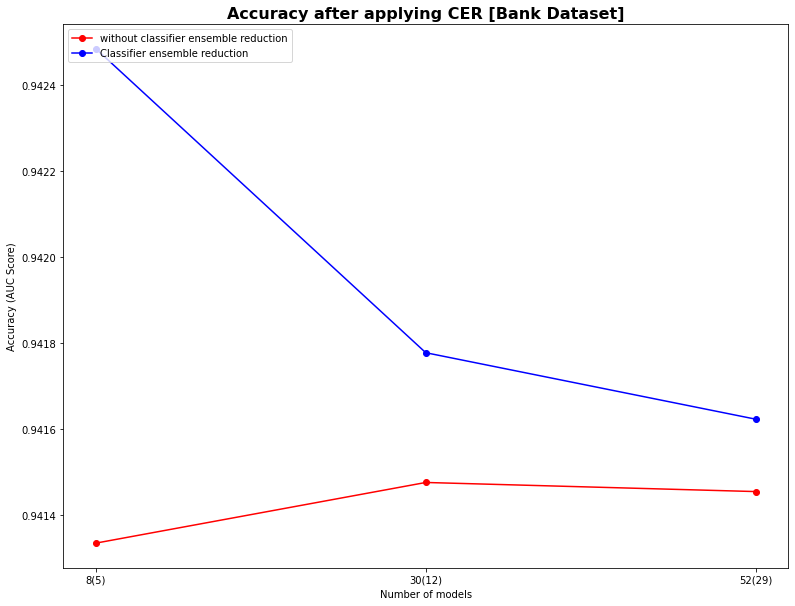

In [125]:
plt.figure(figsize=(13,10))
plt.plot(x_val, accu, '-', color="r",marker='o', label="without classifier ensemble reduction")
plt.plot(x_val, accu_2, '-', color="b", marker='o',label="Classifier ensemble reduction")
plt.legend(loc="upper left")

plt.title("Accuracy after applying CER [Bank Dataset]", fontsize=16, fontweight='bold')
plt.xlabel("Number of models")
plt.ylabel("Accuracy (AUC Score)")
xte=[8,30,52]
my_xticks = ['8(5)','30(12)','52(29)']
plt.xticks(xte, my_xticks)
plt.show()


The accuracy of the reduced ensemble classifier is greater than of the original classifier in all cases.
X axis lables is number of models. for e.g 8(5).Here 8 shows number of models we have taken and 5 shows number of models are after reduction using recursiver harmony search algorithm. <br>
y axis shows AUC score for checking accuracy.


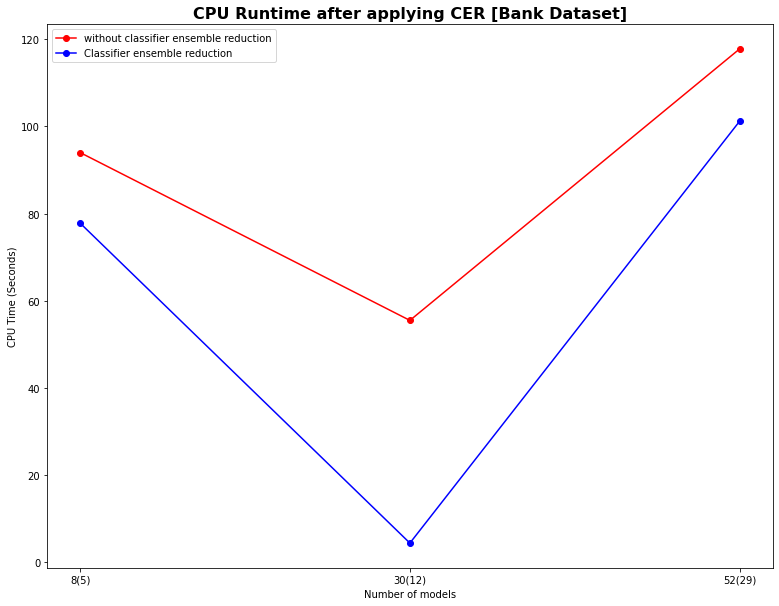

In [126]:
plt.figure(figsize=(13,10))
plt.plot(x_val, CPU_time_without_reduction, '-',marker='o', color="r", label="without classifier ensemble reduction")
plt.plot(x_val, CPU_time_with_reduction, '-',marker='o', color="b", label="Classifier ensemble reduction")
plt.legend(loc="upper left")

plt.title("CPU Runtime after applying CER [Bank Dataset]", fontsize=16, fontweight='bold')
plt.xlabel("Number of models")
plt.ylabel("CPU Time (Seconds)")
xte=[8,30,52]
my_xticks = ['8(5)','30(12)','52(29)']
plt.xticks(xte, my_xticks)
plt.show()


This graph shows how cpu runtime varies when we take different number of models. In all cases, the reduced ensemble classifier has a faster CPU run time, thereby reducing system overhead.

----

--- 

We have also implemented and tested the recursive harmony search feature selection algorithm again <b> The Heart Dataset</b>. Results of which are as follows:

Ensemble Classifiers

| Number of Models| Accuracy | CPU Time |
| --- | --- | --- |
| 8 | 0.9004 | 31.00 |
| 30 | 0.9014 | 28.43|
| 52 | 0.9087 | 45.79 |

Ensemble Classifiers Reduction

| Number of Models| Accuracy | CPU Time |
| --- | --- | --- |
| 4 | 0.9087 | 28.76 |
| 15 | 0.9058 |21.28|
| 30 | 0.9097 |41.19 |

![](https://user-images.githubusercontent.com/59700753/102702972-fde14c00-4236-11eb-8fe7-15548a7aebdd.png)

![](https://user-images.githubusercontent.com/59700753/102702990-34b76200-4237-11eb-9338-c18d0777d8c0.png)

---

# Conclusion

● The recursive classifier ensemble reduction results in a reduced subset of classifiers that
are used to train the ensemble classifier. This reduced set of the ensemble classifiers
eliminates redundancy and is shown to run faster than the original set of the ensemble
classifier.

● The recursive classifier ensemble reduction technique minimizes redundancy, maintains and
improves diversity and accuracy, and reduces system memory and run time requirements.

--- 

# References

https://ieeexplore.ieee.org/document/8663245 <br>
https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/springerEBR09.pdf <br>
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/ <br>
https://blog.statsbot.co/ensemble-learning-d1dcd548e936 <br>
https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f <br>
https://www.degruyter.com/view/journals/jisys/27/3/article-p465.xml?language=en <br>


--- 

**MIT License**

Copyright (C) 2020 Shalini Chandra & Shubham Mahajan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



--- 